# 💻 Laboratory Task 5
### Data Augmentation on EEG/ECG Signals(PhysioNet EEG Motor Movement/Imagery)
**Submitted by:** Rekha R  
**Enrollment No.:** MT23AAI063

###Mount Google Drive

In [ ]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Install mne

In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.2 MB/s eta 0:00:00


### Read an EDF EEG File

Extracting EDF parameters from /content/drive/MyDrive/eeg-motor-movementimagery/files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
Using matplotlib as 2D backend.


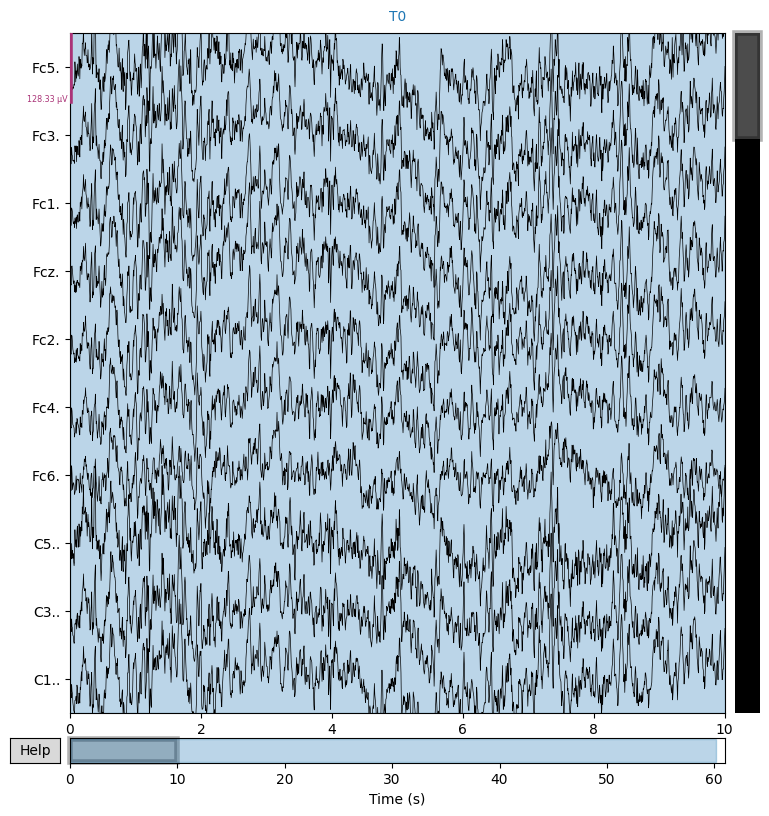

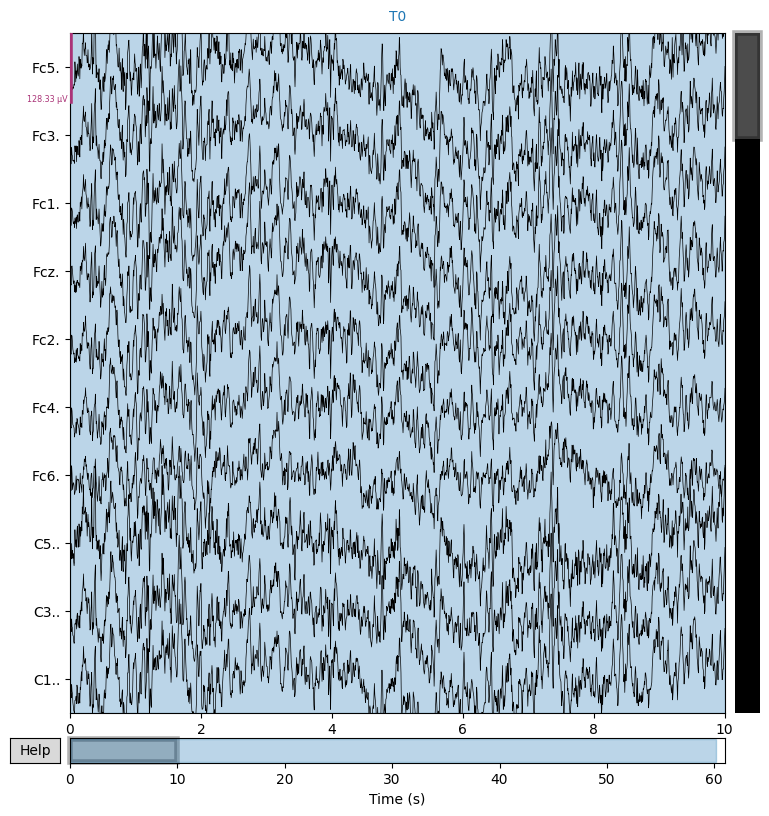

In [ ]:
import mne

# Load EEG file
file_path = '/content/drive/MyDrive/eeg-motor-movementimagery/files/S001/S001R02.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)

# Basic info
print(raw.info)

# Plot a sample EEG segment
raw.plot(n_channels=10, duration=10, scalings='auto')


### Augmentation Techniques on EEG/ECG signals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# 1. Create a sample signal (replace this with actual EEG/ECG signal)
np.random.seed(42)
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + 0.1 * np.random.randn(1000)  # Simulated signal

# 2. Augmentation Functions
def time_warp(signal, factor=1.2):
    return zoom(signal, factor)[:len(signal)]

def add_noise(signal, noise_type='gaussian'):
    if noise_type == 'gaussian':
        noise = np.random.normal(0, 0.1, len(signal))
        return signal + noise
    elif noise_type == 'salt_pepper':
        s = signal.copy()
        num_points = int(0.05 * len(signal))
        idx = np.random.choice(len(signal), num_points, replace=False)
        s[idx[:num_points//2]] = 1
        s[idx[num_points//2:]] = -1
        return s

def random_crop(signal, crop_len=800):
    start = np.random.randint(0, len(signal) - crop_len)
    return signal[start:start + crop_len]

def normalize(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# 3. Apply Augmentations
tw_signal = time_warp(signal, factor=1.1)
noise_signal = add_noise(signal)
crop_signal = random_crop(signal, crop_len=800)
norm_signal = normalize(signal)




### Time Warping

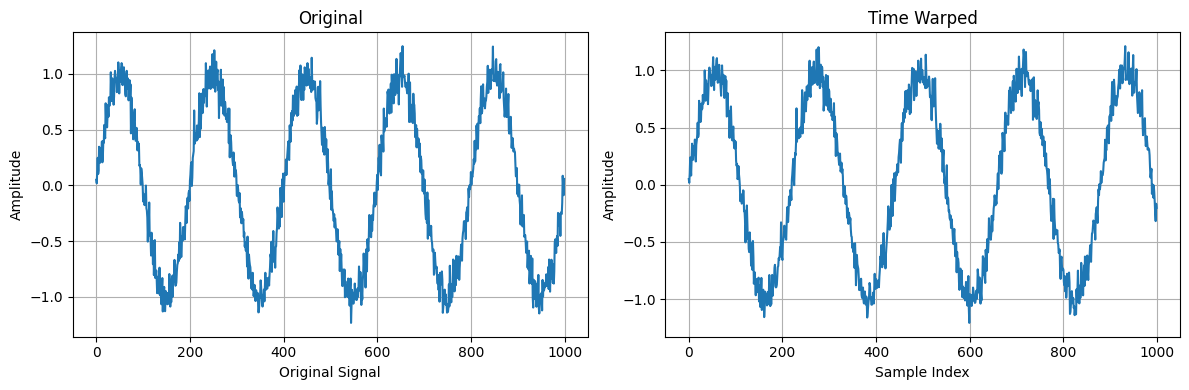

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Original")
plt.xlabel("Original Signal")
plt.ylabel("Amplitude")
plt.grid()

# Time Warped
plt.subplot(1, 2, 2)
plt.plot(tw_signal[:len(signal)])
plt.title("Time Warped")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

### Adding Noise

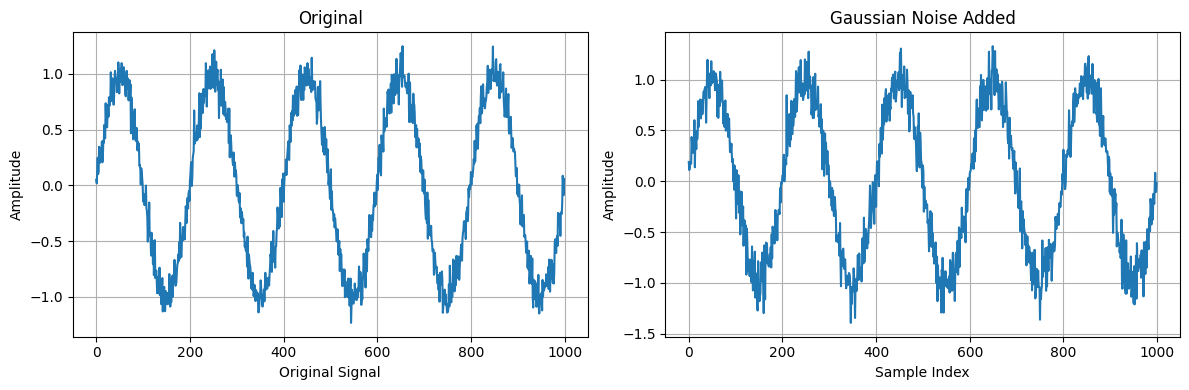

In [ ]:
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Original")
plt.xlabel("Original Signal")
plt.ylabel("Amplitude")
plt.grid()

# Gaussian Noise
plt.subplot(1, 2, 2)
plt.plot(noise_signal[:len(signal)])
plt.title("Gaussian Noise Added")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

### Random Cropping

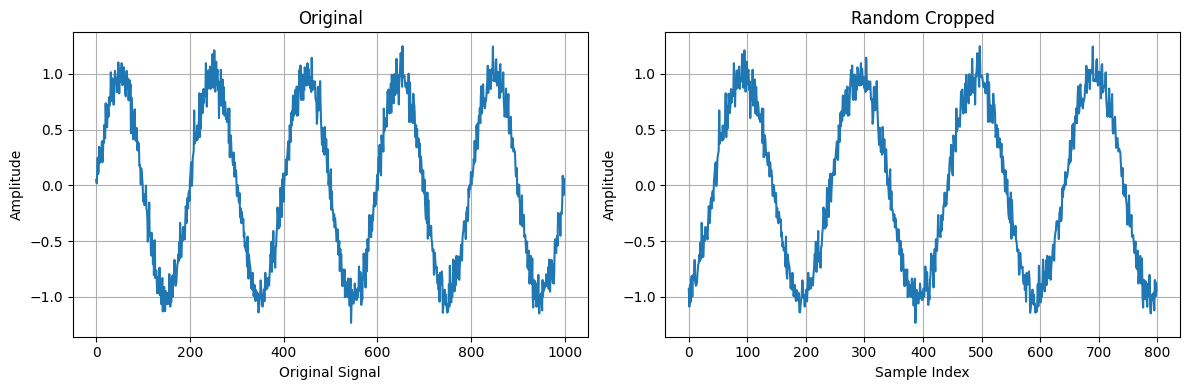

In [ ]:
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Original")
plt.xlabel("Original Signal")
plt.ylabel("Amplitude")
plt.grid()

# Random Cropped
plt.subplot(1, 2, 2)
plt.plot(crop_signal[:len(signal)])
plt.title("Random Cropped")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

### Scaling / Normalization

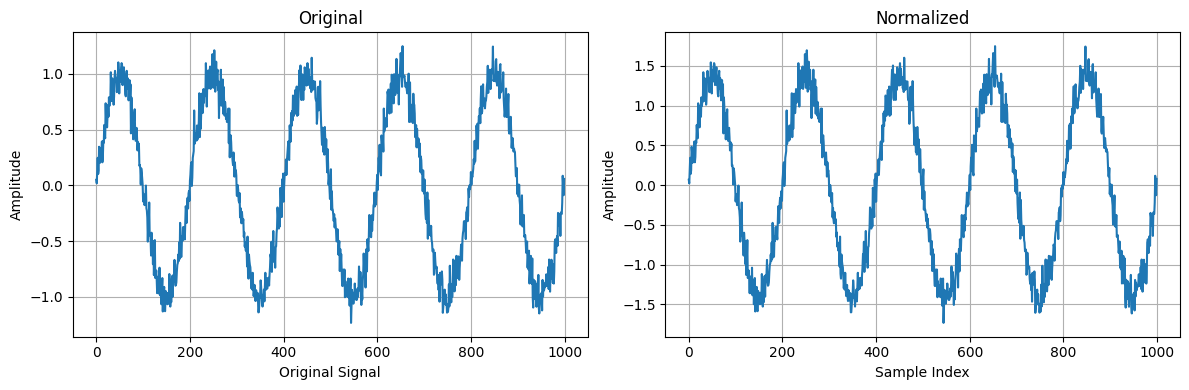

In [ ]:
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Original")
plt.xlabel("Original Signal")
plt.ylabel("Amplitude")
plt.grid()

# Normalization
plt.subplot(1, 2, 2)
plt.plot(norm_signal[:len(signal)])
plt.title("Normalized")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## How these transformations simulate real-world signal variability



#### 1. Time warping
 #### Slightly compresses or expands the time axis

####  Real-world simulation:

1. Mimics changes in heart rate or neural firing rate.

2. For ECG, reflects faster or slower heartbeats.

3. For EEG, can simulate varying reaction times or motor response delays.
       

### 2.Adding Noise
#### Injects random fluctuations or sudden spikes.

#### Real-world simulation:

#### 1 Models sensor noise, muscle artifacts, or external interference (e.g., EMG, powerline noise).

#### 2 Mimics electrode pop-off or abrupt interference

### 3. Random Cropping
#### Selects a random portion of the signal.

#### Real-world simulation:

#### 1. Mimics partial recordings or cases where signals are incomplete or shorter due to interruptions.

#### 2. Helps model generalize to segments of variable length and context.

 ### 4. Scaling / Normalization
#### Standardizes amplitude across signals.

#### Real-world simulation:

#### 1. Accounts for inter-patient variability in amplitude (e.g., signal strength varies based on electrode placement or skin resistance).

#### 2. Helps the model focus on signal shape rather than absolute magnitude